In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [5]:
df["year"]=pd.DatetimeIndex(df["date"]).year
df["total_STR_landed"] = df["R_avg_SIG_STR_landed"]+df["B_avg_SIG_STR_landed"]
df["total_avg_LEG_landed"] = df["R_avg_LEG_landed"]+df["B_avg_LEG_landed"]

<AxesSubplot:xlabel='years'>

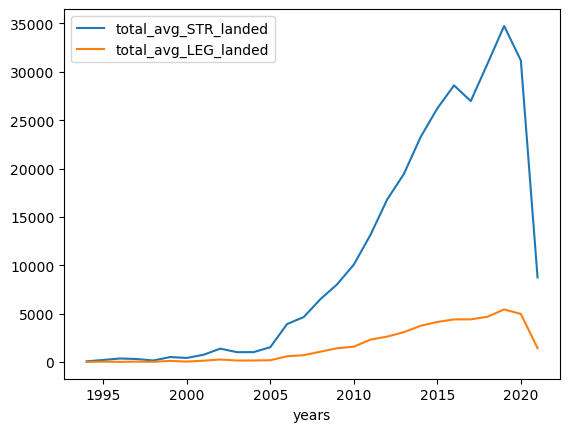

In [6]:
data = [[],[],[]]
for i in range(len(df["year"])-1):
    if(df["year"].values[i] != df["year"].values[i+1]):
        data[0].append(df["year"][i])
# add the last element
data[0].append(df["year"].values[-1])
for i in range(len(data[0])):
    data[1].append(df.loc[df["year"] == int(data[0][i])]["total_avg_LEG_landed"].sum())
for i in range(len(data[0])):
    data[2].append(df.loc[df["year"] == int(data[0][i])]["total_STR_landed"].sum())
analytics_df = pd.DataFrame(data).transpose()
analytics_df.columns = ["years","total_avg_LEG_landed","total_avg_STR_landed"]
analytics_df.plot(x="years",y=["total_avg_STR_landed","total_avg_LEG_landed"])

In [7]:
df[["R_avg_SIG_STR_landed","B_avg_SIG_STR_landed"]].describe()

,R_avg_SIG_STR_landed,B_avg_SIG_STR_landed
count,5300.000000,4585.000000
mean,34.808436,33.337168
std,22.568121,22.030474
min,0.000000,0.000000
25%,18.932042,17.000000
50%,30.500000,29.687500
75%,46.000000,45.500000
max,212.142956,186.000000


In [8]:
analytics_df.loc[(analytics_df["total_avg_STR_landed"] == analytics_df["total_avg_STR_landed"].max()) & (analytics_df["total_avg_LEG_landed"] == analytics_df["total_avg_LEG_landed"].max())]

,years,total_avg_LEG_landed,total_avg_STR_landed
2,2019.0,5437.234401,34744.385224


<AxesSubplot:title={'center':'Total Significant Strikes in UFC from 1994-2021'}, xlabel='Year', ylabel='Total average significant strikes landed'>

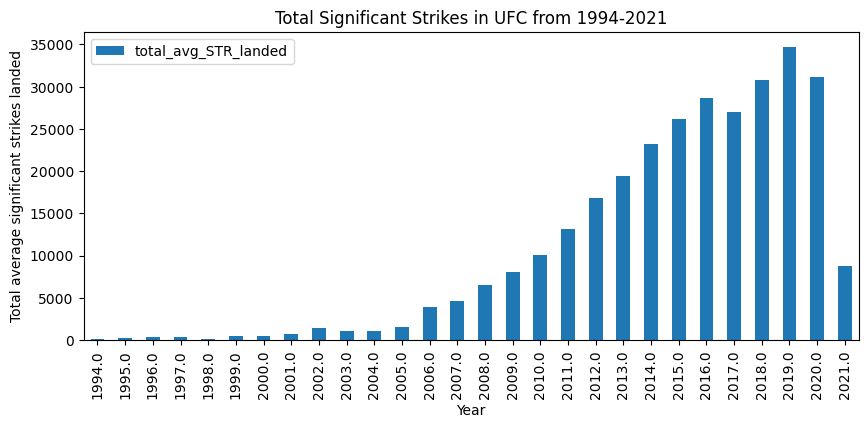

In [9]:
analytics_df.sort_values(by=["years","total_avg_LEG_landed","total_avg_STR_landed"]).plot("years","total_avg_STR_landed",xlabel="Year",ylabel="Total average significant strikes landed",figsize=[10,4],kind="bar",title="Total Significant Strikes in UFC from 1994-2021")

In [10]:
df[["total_STR_landed","total_avg_LEG_landed"]].value_counts()

total_STR_landed  total_avg_LEG_landed
46.500000         5.500000                3
28.000000         9.000000                3
15.000000         2.000000                3
8.000000          0.000000                3
12.000000         0.000000                3
                                         ..
52.615723         5.366699                1
52.625000         7.687500                1
52.636597         4.671997                1
52.651367         11.254425               1
297.621616        11.437498               1
Length: 4261, dtype: int64

In [11]:
color = ["red"] * (df.shape[0]+1) + ["blue"] * (df.shape[0]+1)
plot_color = df["Winner"].apply(lambda x: "red" if x == "Red" else "blue" if x == "Blue" else "yellow")

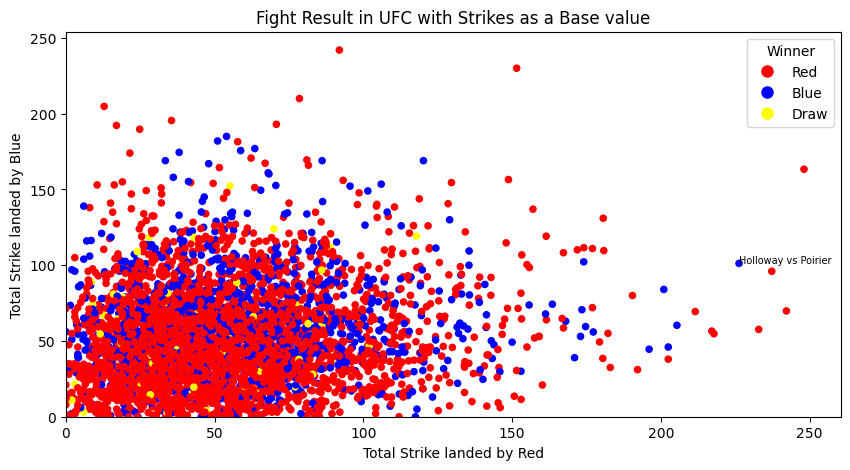

In [12]:
df.plot(x="R_avg_TOTAL_STR_landed",y="B_avg_TOTAL_STR_landed",c=plot_color,kind="scatter",xlabel="Total Strike landed by Red",ylabel="Total Strike landed by Blue",figsize=[10,5])
plt.xlim(0)
plt.ylim(0)
legend_labels = {"Red": "Red", "Blue": "Blue", "Draw": "Yellow"}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=legend_labels[label], markersize=10) for label in legend_labels]
plt.title("Fight Result in UFC with Strikes as a Base value")
plt.legend(handles=handles, labels=legend_labels, title="Winner")
plt.text(x=226.2864997558594,y=101.222421973876953,s="Holloway vs Poirier",fontdict=dict(color="black",size=7))
# Show the plot
plt.show()

In [13]:
df.loc[(df["B_fighter"] == "Max Holloway") | (df["R_fighter"] == "Max Holloway")][["R_avg_TOTAL_STR_landed","B_avg_TOTAL_STR_landed"]]

,R_avg_TOTAL_STR_landed,B_avg_TOTAL_STR_landed
113,132.767928,86.593750
382,129.609375,154.535856
588,174.071712,102.218750
801,217.143425,56.509131
951,226.286850,101.222420
1123,145.573700,32.484375
1600,110.147400,60.365234
1855,64.730469,92.294800
2045,86.589600,72.056641
2327,62.179199,45.019531


In [14]:
df["R_avg_LEG_landed"].max()

62.3515625

In [15]:
df.loc[(df["R_avg_LEG_landed"]==62.3515625)|(df["B_avg_LEG_landed"]==51.635986328125)]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,year,total_STR_landed,total_avg_LEG_landed
493,Zhang Weili,Joanna Jedrzejczyk,Keith Peterson,2020-03-07,"Las Vegas, Nevada, USA",Red,True,WomenStrawweight,0.000244,0.035156,...,0,Switch,162.56,160.02,115.0,32.0,30.0,2020,178.106934,65.760986
1658,Joanna Jedrzejczyk,Rose Namajunas,John McCarthy,2017-11-04,"New York City, New York, USA",Blue,True,WomenStrawweight,0.500000,0.000000,...,0,Orthodox,167.64,165.10,115.0,25.0,30.0,2017,248.015625,66.101562


<AxesSubplot:title={'center':'Calf Kick Usage in UFC from 1994-2021'}, xlabel='Year', ylabel='Total Average Calf Kick Landed'>

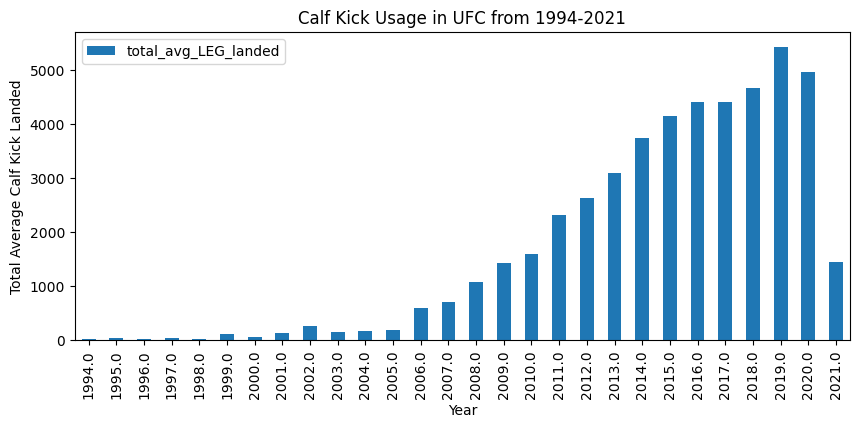

In [16]:
analytics_df.sort_values(by=["years","total_avg_LEG_landed","total_avg_STR_landed"]).plot("years","total_avg_LEG_landed",xlabel="Year",ylabel="Total Average Calf Kick Landed",figsize=[10,4],kind="bar",title="Calf Kick Usage in UFC from 1994-2021")

In [16]:
max(data[2])

34744.38522394234

<AxesSubplot:title={'center':'Calf Kick Usage in UFC base on Jon Jones fight from 2008-2021'}, xlabel='Year', ylabel='Total Average Calf Kick Landed (Jon Jones Fight)'>

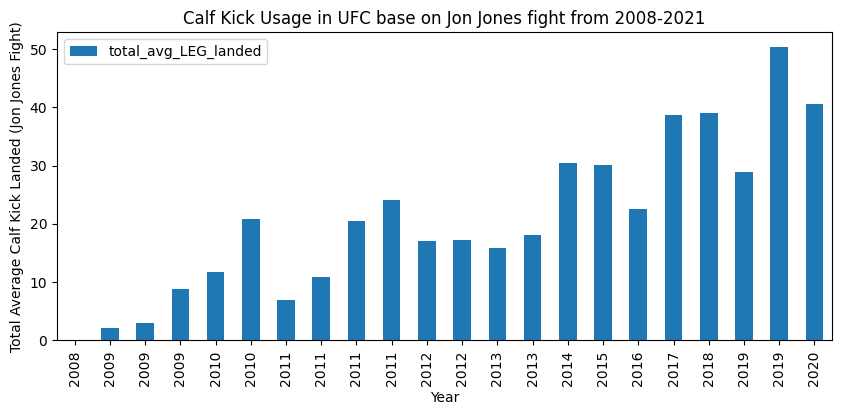

In [17]:
df.loc[(df["R_fighter"]=="Jon Jones") | (df["B_fighter"]=="Jon Jones")].sort_values(by=["year","total_avg_LEG_landed"]).plot("year","total_avg_LEG_landed",xlabel="Year",ylabel="Total Average Calf Kick Landed (Jon Jones Fight)",figsize=[10,4],kind="bar",title="Calf Kick Usage in UFC base on Jon Jones fight from 2008-2021")